# Este programa faz a limpeza dos nomes Fabricantes de vacinas
que aparecem de várias formas digitadas:

In [2]:
# Importando as Bibliotecas:

import csv
import time
import requests 
import pandas as pd
from datetime import datetime

# Importar bibliotecas para construir gráficos:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:

df = pd.read_csv("BD_Amostra-Alguns-26-05-2021.csv", sep=";")
usecols = ['vacina_fabricante_nome',
                 'paciente_idade',
                 'paciente_id',
                 'vacina_dataAplicacao',
                 'paciente_endereco_uf',
                 'vacina_descricao_dose']

               

In [3]:
df.shape

(61478, 6)

In [4]:

df['vacina_fabricante_nome']

0                       FUNDACAO BUTANTAN
1                       FUNDACAO BUTANTAN
2                   FUNDACAO OSWALDO CRUZ
3                       FUNDACAO BUTANTAN
4                       FUNDACAO BUTANTAN
                       ...               
61473                   FUNDACAO BUTANTAN
61474               FUNDACAO OSWALDO CRUZ
61475        BioNTech/Fosun Pharma/Pfizer
61476    University of Oxford/AstraZeneca
61477    University of Oxford/AstraZeneca
Name: vacina_fabricante_nome, Length: 61478, dtype: object

# Limpeza do campo "vacina_fabricante_nome"  para deixar padronizada

O Nome da Vacina Oxford-AstraZeneca e a Fiocruz como foram digitados:

        'ASTRA ZENECA /FIOCRUZ', 
        'ASTRA ZENECA FIO CRUZ', 
        'ASTRAZENECA',
        'ASTRAZENECA AB', 
        'ASTRAZENECA FARMACEUTICA DO BRASIL LTDA',
        'ASTRAZENECA FIO CRUZ', 
        'ASTRAZENECA/FIOCRUZ', 
        'ASTRAZENECA/OXFORD',
        'ASTRAZENICA', 
        'ASTRAZENICA/FIOCRUZ', 
        'AstraZeneca/Fiocruz',
        'AstraZeneca/Oxford' 
        'OXFORD / ASTRA ZENECA', 
        'OXFORD-ASTRAZENECA', 
        'OXFORD/ ASTRA ZENECA',
        'OXFORD/ ASTRAZENECA', 
        'OXFORD/ASTRA ZENECA', 
        'OXFORD/ASTRAZENECA',
        'Oxford Astrazeneca', 
        'Oxford/AstraZeneca',
        'OXFORD / ASTRA ZENECA',
        'OXFORD-ASTRAZENECA', 
        'OXFORD/ ASTRA ZENECA',
        'OXFORD/ ASTRAZENECA'
        'OXFORD/ASTRA ZENECA',
        'OXFORD/ASTRAZENECA',
        'University of Oxford/AstraZeneca',
====>>>
 Vacina Instituto Butanta 
        'BUTANTA', 
        'BUTANTA/CORANAVAC', 
        'BUTANTAN',
        'BUTANTAN - FUNDACAO BUTANTAN'
        'Inst. Butantan',
        'Instituto Butantan'
        
        
Vacina da Sinovac:

       'SINOVAC LIFE SCIENCE CO LTD', 
       'SINOVAC-BUTANTAN', 
       'SINOVAC/ BUTANTAN',
       'SINOVAC/BUTAANTAN', 
       'SINOVAC/BUTANTA', 
       'SINOVAC/BUTANTAN',
       'SINOVAC/Butantan', 
       'SINOVAC/CORONAVAC', 
       'SINOVAC/butantan', 
       'Sinovac',
       'Sinovac / Butantan', 
       'Sinovac/Butanta', 
       'Sinovac/Butantan',
       'Sinovac/butantan',
       'butantan',
       'butantan/ sinovac',
       'butantan/sinovac', 
       'butatan', 'coronavac',
       'sinovac/ butantan', 
       'sinovac/butantam', 
       'sinovac/butantan'
       

Vacina Serum:
       'SERUM INSTITUTE OF INDIA LTD',
       'SERUM INSTITUTE OF INDIA LTD.'

Vacina Phizer:     

        'BioNTech/Fosun Pharma/Pfizer'
        'PFIZER/BIONTECH'
        
        
DESCONHECIDOS:
        'IMTRAMUSCULAR', 
        'INTERVAX LTDA', 
        'MINISTERIO DA SAUDE',
        'Display_of_organization/',
        'berna_biotech_korea_corporation'
        'intervax_ltda',
        'organization/

OUTRAS VACINAS:

Moderna, Sinopharm/Beijing,  Covaxin


In [5]:

df["vacina_fabricante_nome"].describe()                    

count                 59935
unique                   69
top       FUNDACAO BUTANTAN
freq                  25896
Name: vacina_fabricante_nome, dtype: object

In [6]:
# Continuando a limpeza do campo Vacina_Fabricante_Nome:
# 1) Transforma toda coluna letras maiúsculas em minúsculas
# 2) Troca espaço em branco por "_"
# 3) trata os acentos, caracteres especiais e tira acentos 

# Tratando o fabricante Astrazeneca - Oxford - Fio Cruz

df["nome_limpo"] = (df["vacina_fabricante_nome"]
                        .str.lower()
                        .str.replace(" ", "_")
                        .str.normalize("NFKD")
                        .str.encode("ascii", errors = "ignore")
                        .str.decode("utf8")) 
                                 

In [8]:
# Remove as linhas que contém NULLS ==> NA / NaN values,
# mas será necessário usar o subset para remover completamente
# a linha do DataFrame:

df["nome_limpo"] = df["nome_limpo"].fillna("-")


# Fazendo a limpeza do campo "vacina_descricao_dose" que contém os Fabricantes das Vacinas

In [9]:
# AstraZeneca/Oxford = Astrazeneca, Universidade Oxford, Oxford, FioCruz:


print("Início da análise dos Fabricantes ....")


# Tratando da Vacina: ASTRAZENECA:

df.loc[df["nome_limpo"].str.contains("astrazenica"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("astrazeneca/oxford"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("oxford"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("university_of_oxford/astrazeneca"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('astrazeneca_.fio_cruz'), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("fiocruz"), "nome_limpo"]    = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('aztrazenica'), "nome_limpo"]    = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('fio_cruz'), "nome_limpo"]    = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('fio_cruz'), "nome_limpo"]    = "astrazeneca"                          
df.loc[df["nome_limpo"].str.contains('aztrazenica'), "nome_limpo"]    = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('astra_zeneca'), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('fiocuz'), "nome_limpo"]    = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("astrazeneca/fiocruz"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("astra_zeneca_fio_cruz"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("oxford/astra_zeneca"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("fundacao_oswaldo_cruz"), "nome_limpo"]   = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("bio-manguinhos"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("fiocruz_-_biomanguinhos_"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains("astrazeneca_farmaceutica_do_brasil_ltda"), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('astragenica'), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('astrazenic'), "nome_limpo"] = "astrazeneca"
df.loc[df["nome_limpo"].str.contains('covid-19-astrazeneca'), "nome_limpo"] = "astrazeneca"
print("Vacina AstraZeneca - OK")                               

Início da análise dos Fabricantes ....
Vacina AstraZeneca - OK


In [16]:
# Limpeza do campo "vacina_fabricante_nome" com a Fabricante PHIZER:
#
df.loc[df["nome_limpo"].str.contains("biontech"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains("pfizer/biontech"), "nome_limpo"]   = "pfizer"
df.loc[df["nome_limpo"].str.contains("Pfizer"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains("phizer"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains("biontech/fosun pharma/pfizer"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains("biontech/fosun_pharma/pfizer"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains("pfizer_manufacturing_belgium_nv_belgiva"), "nome_limpo"] = "pfizer"
df.loc[df["nome_limpo"].str.contains('pfizer_manufacturing_belgium_nv_-_belgiva'), "nome_limpo"] = "pfizer"
print("Vacinas da Phizer...OK")

Vacinas da Phizer...OK


In [11]:
# CoronaVac = Sinovac Biotech, Instituto Butantan, Butanta, Butaantan, Fio Cruz, 

df.loc[df["nome_limpo"].str.contains("fundacao_butantan"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("butaantan"), "nome_limpo"]   = "Coronavac/Sinovac"    
df.loc[df["nome_limpo"].str.contains('buntantan'), "nome_limpo"]   = "Coronavac/Sinovac" 
df.loc[df["nome_limpo"].str.contains("butatan"), "nome_limpo"] =  "Coronavac/Sinovac"                                    
df.loc[df["nome_limpo"].str.contains("butantan/sinovac"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("inst._butantan"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("sinovac"), "nome_limpo"]    = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("coronavac"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("covid-19_-_coronavac"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("covid-19 - Coronavac"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("butantan/_sinovac"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("sinovac_life_science_co_ltd"), "nome_limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("sinovac/butantam"), "nome_limpo"] = "Coronavc/Sinovac"
df.loc[df["nome_limpo"].str.contains("butanta/coranavac"), "nome-limpo"] = "Coronavac/Sinovac"
df.loc[df["nome_limpo"].str.contains("astrazeneca_ab"), "nome_limpo"] =  "Coronavac/Sinovac"                                                                                         
df.loc[df["nome_limpo"].str.contains("astrazeneca_fio_cruz"), "nome_limpo"] = "Coronavac/Sinovac"                                     
df.loc[df["nome_limpo"].str.contains("instituto_butantan"), "nome_limpo"] = "Coronavac/Sinovac" 
df.loc[df["nome_limpo"].str.contains("butanta"), "nome_limpo"] = "Coronavac/Sinovac"  

print("VAcina Sinovac - OK")

VAcina Sinovac - OK


In [17]:
# Abbott ==> abbott_biologicals_b.v._weesp_-_holanda       

df.loc[df["nome_limpo"].str.contains("abbot"), "nome_limpo"] = "abbott"
df.loc[df["nome_limpo"].str.contains('abbott_biologicals_b.v._weesp_-_holanda'), "nome_limpo"] = "abbott"

print("Vacina Abbott - Ok")
       
# Serum ==> Serum Institute of India
                                    
df.loc[df["nome_limpo"].str.contains("serum"), "nome_limpo"] = "serum"
df.loc[df["nome_limpo"].str.contains('serum_institute_of_india'), "nome_limpo"] = "serum"
df.loc[df["nome_limpo"].str.contains("serum_institute_of_india_ltd."), "nome_limpo"] = "serum"                                    

print("Vacina Serum - OK")

# Covishield:
df.loc[df["nome_limpo"].str.contains("covishield"), "nome_limpo"] = "covishield" 
df.loc[df["nome_limpo"].str.contains("covid-19_-_covishield"), "nome_limpo"] = "covishield"


# chadox1:==> ChAdOx1 nCoV-19

df.loc[df["nome_limpo"].str.contains("covid-19_-_chadox1_ncov-19"), "nome_limpo"] = "chadox1"        
df.loc[df["nome_limpo"].str.contains("chadox"), "nome_limpo"] = "chadox1"   

print("Vacina Chad0x1 - OK")

# Vacina Janssen-Cilag = Jonhson
       
df.loc[df["nome_limpo"].str.contains("janssen"), "nome_limpo"] = "janssen"  

print("Vacina - Janssen - OK")


df.loc[df["nome_limpo"].str.contains('chiron_s.p.a._vaccines'), "nome_limpo"] = 'chiron'                                                                    
df.loc[df["nome_limpo"].str.contains('behring_gmbh'), "nome_limpo"] = 'behring'   


Vacina Abbott - Ok
Vacina Serum - OK
Vacina Chad0x1 - OK
Vacina - Janssen - OK


In [18]:
# Preciso Tratar essas campos 'estranhos' e substituir por "-"

df.loc[df["nome_limpo"].str.contains("wyeth_pharmaceuticals"), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('lg_chemical_investiment_ltd'), "nome_limpo"] = "-"                                                                       
df.loc[df["nome_limpo"].str.contains('intervax_ltda' ), "nome_limpo"] = '-'  
df.loc[df["nome_limpo"].str.contains('organization/'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('sanofi_pasteur'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('berna_biotech_korea_corporation'), "nome_limpo"] = "-" 
df.loc[df["nome_limpo"].str.contains('Display_of_organization/61189445000156'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('Display_of_organization/3378155000135'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('IMTRAMUSCULAR'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('imtramuscular'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('ministerio_da_saude'), "nome_limpo"] = "-"
df.loc[df["nome_limpo"].str.contains('ministerio da saude'), "nome_limpo"] = "-"
                                
# Outros:
#        'INTERVAX LTDA', 
#        'MINISTERIO DA SAUDE',
#        'Display_of_organization/',
#        'berna_biotech_korea_corporation'
#        'intervax_ltda',
 
      

In [19]:

df["nome_limpo"].unique()

array(['Coronavac/Sinovac', 'astrazeneca', '-', 'serum', 'chadox1',
       'pfizer', 'covishield'], dtype=object)

# Agora que o campo "vacina_fabricante_nome" está limpo, vamos fazer o gráfico contendo
## os nomes dos fabricantes:

In [22]:
# Criando um DataFrame test para testar a Datetime

test = df

test['vacina_dataAplicacao'] = pd.to_datetime(test['vacina_dataAplicacao'], 
      format = "%Y-%m-%dT%H:%M:%S")


# Criando um Pivot_table onde :
 ## linhas = datas
 ## colunas = marca das Vacinas

In [29]:
test["counters"] = 1


pivot_test = pd.pivot_table(test, 
                            index = "vacina_dataAplicacao", 
                            columns = "nome_limpo",
                            values  = "counters",
                            aggfunc = "sum",
                            fill_value = 0)

pivot_test = pivot_test.reset_index()

In [14]:
# Removendo as datas inconsistentes no Banco de Dados:

In [30]:

pivot_test = pivot_test.loc[(pivot_test["vacina_dataAplicacao"] >= "2021-01-19") & 
                            (pivot_test["vacina_dataAplicacao"] <  "2021-05-26")].reset_index(drop=True)

In [31]:
# pivot_test.sum()

pivot_test.sum()


nome_limpo
-                     3351
Coronavac/Sinovac    37725
astrazeneca          18384
chadox1                 37
covishield              19
pfizer                 436
serum                 1520
dtype: int64

# Separando os Fabricantes das Vacinas para fazer o Plot:

In [32]:

for nome_vacina in pivot_test.columns[1:]:
    pivot_test[f"{nome_vacina}_acumulado"] = pivot_test[nome_vacina].cumsum()

# Fazendo o Plot:

In [33]:
pivot_test

nome_limpo,vacina_dataAplicacao,-,Coronavac/Sinovac,astrazeneca,chadox1,covishield,pfizer,serum,-_acumulado,Coronavac/Sinovac_acumulado,astrazeneca_acumulado,chadox1_acumulado,covishield_acumulado,pfizer_acumulado,serum_acumulado
0,2021-01-19 00:00:00+00:00,1,63,0,0,0,0,4,1,63,0,0,0,0,4
1,2021-01-19 03:00:00+00:00,0,1,0,0,0,0,0,1,64,0,0,0,0,4
2,2021-01-20 00:00:00+00:00,2,338,0,0,0,0,10,3,402,0,0,0,0,14
3,2021-01-20 03:00:00+00:00,0,3,0,0,0,0,0,3,405,0,0,0,0,14
4,2021-01-20 12:15:50+00:00,0,1,0,0,0,0,0,3,406,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2021-05-21 00:00:00+00:00,73,129,286,0,0,13,2,3110,37532,17667,37,19,373,1520
159,2021-05-22 00:00:00+00:00,62,49,202,0,0,13,0,3172,37581,17869,37,19,386,1520
160,2021-05-23 00:00:00+00:00,8,13,21,0,0,0,0,3180,37594,17890,37,19,386,1520
161,2021-05-24 00:00:00+00:00,82,73,297,0,0,6,0,3262,37667,18187,37,19,392,1520


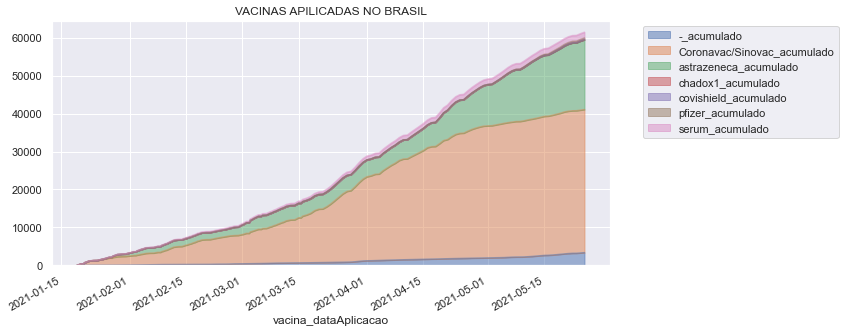

In [34]:
columns_to_plot = [w for w in pivot_test.columns if "acumulado" in w]

(pivot_test
 .set_index("vacina_dataAplicacao")
 .loc[:, columns_to_plot]
 .plot(kind="area", stacked=True, figsize=(10,5), alpha=.5))

plt.title('VACINAS APILICADAS NO BRASIL')

# Somente tirando a legenda para fora do gráfico
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))